# What are the most demanded skills for the top 3 most popular data roles?

Methodology
    1. clean up skill column
    2. Calculate skills count based on job_title_short
    3. Calculate skill percentage
    4. plot findings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from ast import literal_eval

c:\Users\micha\anaconda3\envs\dataproj1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data= load_dataset("lukebarousse/data_jobs")

In [4]:
df = data['train'].to_pandas()
df["job_posted_date"] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: literal_eval(x) if not pd.isna(x) else x)

In [5]:
df_us = df[df['job_country'] == "United States"].copy()

In [6]:
df_explode = df_us.explode("job_skills").copy()
df_explode.sample(3, random_state=26)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
573232,Data Scientist,Data Scientist IV,"Triana, AL",via BeBee,Full-time,False,"Florida, United States",2023-11-24 09:04:00,False,False,United States,None,NaN,NaN,Alta It Services,pytorch,"{'databases': ['mongodb'], 'libraries': ['spar..."
75630,Data Scientist,Healthcare Data Scientist - Remote,Anywhere,via Recruit.net,Full-time,True,"California, United States",2023-01-29 00:04:21,False,True,United States,None,NaN,NaN,UnitedHealth Group,r,"{'analyst_tools': ['sas'], 'libraries': ['hado..."
411727,Data Engineer,Data Engineer,"San Francisco, CA",via Lensa,Full-time,False,"New York, United States",2023-08-13 16:04:42,False,True,United States,None,NaN,NaN,Sia Partners,flow,"{'cloud': ['aws', 'azure', 'snowflake', 'redsh..."


In [7]:
df_skills_count = df_explode.groupby(['job_title_short','job_skills']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count.head(3)

,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034


In [8]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

In [9]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name="Job_Total")

In [10]:
df_skill_perc = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")
df_skill_perc["perc"] = df_skill_perc['skill_count'] / df_skill_perc['Job_Total'] * 100
df_skill_perc

,job_title_short,job_skills,skill_count,Job_Total,perc
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


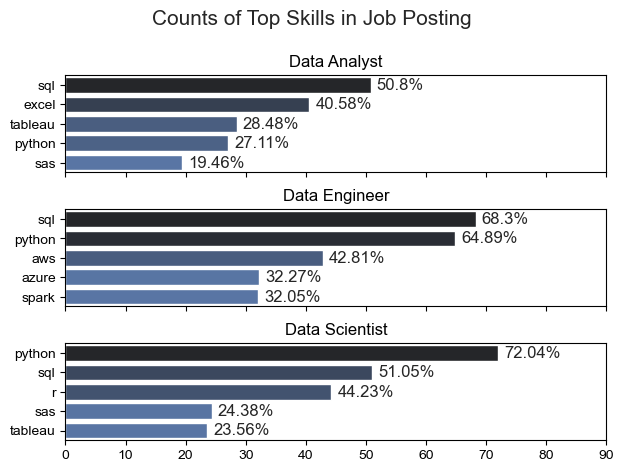

In [11]:
fig, ax = plt.subplots(len(job_titles),1, sharex=True)
sns.set_theme(style="ticks")
for ind, job_title in enumerate(job_titles):
    temp = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head()
   # temp.plot(kind="barh", x="job_skills", y='perc', ax=ax[ind], title=job_title)
    sns.barplot(data=temp, x="perc", y="job_skills", hue="skill_count", palette="dark:b_r", ax=ax[ind])
    ax[ind].set_ylabel("")
    ax[ind].set_title(job_title)
    ax[ind].set_ylabel("")
    ax[ind].set_xlabel("")
    ax[ind].set_xlim(0,90)
    ax[ind].legend().set_visible(False)

    for i, v in enumerate(temp['perc']):
        ax[ind].text(v + 1,i, f"{round(v,2)}%", va='center')
    

fig.suptitle("Counts of Top Skills in Job Posting", fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()